<a href="https://colab.research.google.com/github/sanjayjoker7/AI-NEGOTIATION-AGENT/blob/main/MALL_CUSTOMERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GEN AI/DATASET/Mall_Customers (1).csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
x=['Annual Income (k$)','Spending Score (1-100)']
x=df[x]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaler = scaler.fit_transform(x)


In [ ]:
from sklearn.cluster import KMeans
kmean=KMeans(n_clusters=5,random_state=42)
df['Cluster']=kmean.fit_predict(x_scaler)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

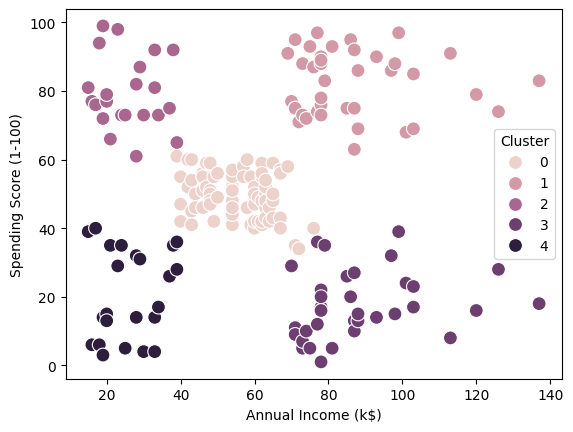

In [ ]:
import seaborn as sns
sns.scatterplot(df,x="Annual Income (k$)",y="Spending Score (1-100)", hue="Cluster", s=100)

In [ ]:
import gradio as gr
def customer(annual,score):
  new_customer=[[annual,score]]
  pred=kmean.predict(scaler.transform(new_customer))[0]
  return f"predicted cluster is {pred}"
demo=gr.Interface(
    fn=customer,
    inputs=[
        gr.Number(),
        gr.Number(),
    ],
    outputs="text"
)
demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ed8094ab49086983a7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

df=pd.read_csv('/content/groceries.csv')

transaction=df.apply(lambda row:row.dropna().tolist(),axis=1).tolist()
transaction

[['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk', 'pastry'],
 ['whole milk'],
 ['tropical fruit',
  'cream cheese ',


In [ ]:
te=TransactionEncoder()
te_ary=te.fit(transaction).transform(transaction)
encode=pd.DataFrame(te_ary,columns=te.columns_)
encode.head(1)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
frequent=apriori(encode,min_support=0.03,use_colnames=True)
rules=association_rules(frequent,metric="confidence",min_threshold=0.03)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(bottled water),(whole milk),0.110535,0.255542,0.034371,0.310948,1.216816,1.0,0.006124,1.080408,0.200326,0.103617,0.074424,0.222724
1,(whole milk),(bottled water),0.255542,0.110535,0.034371,0.134501,1.216816,1.0,0.006124,1.027690,0.239346,0.103617,0.026944,0.222724
2,(citrus fruit),(whole milk),0.082672,0.255542,0.030506,0.369004,1.444004,1.0,0.009380,1.179814,0.335192,0.099141,0.152408,0.244191
3,(whole milk),(citrus fruit),0.255542,0.082672,0.030506,0.119379,1.444004,1.0,0.009380,1.041683,0.413027,0.099141,0.040015,0.244191
4,(other vegetables),(rolls/buns),0.193512,0.183954,0.042607,0.220179,1.196925,1.0,0.007010,1.046453,0.204003,0.127240,0.044391,0.225899
5,(rolls/buns),(other vegetables),0.183954,0.193512,0.042607,0.231620,1.196925,1.0,0.007010,1.049594,0.201613,0.127240,0.047251,0.225899
6,(root vegetables),(other vegetables),0.109010,0.193512,0.047387,0.434701,2.246376,1.0,0.026292,1.426658,0.622721,0.185731,0.299061,0.339789
7,(other vegetables),(root vegetables),0.193512,0.109010,0.047387,0.244877,2.246376,1.0,0.026292,1.179927,0.687969,0.185731,0.152490,0.339789
8,(other vegetables),(soda),0.193512,0.174395,0.032744,0.169207,0.970249,1.0,-0.001004,0.993755,-0.036628,0.097694,-0.006284,0.178481
9,(soda),(other vegetables),0.174395,0.193512,0.032744,0.187755,0.970249,1.0,-0.001004,0.992912,-0.035810,0.097694,-0.007139,0.178481


In [ ]:
print(rules[["antecedents","consequents","support","confidence","lift"]])

             antecedents           consequents   support  confidence      lift
0        (bottled water)          (whole milk)  0.034371    0.310948  1.216816
1           (whole milk)       (bottled water)  0.034371    0.134501  1.216816
2         (citrus fruit)          (whole milk)  0.030506    0.369004  1.444004
3           (whole milk)        (citrus fruit)  0.030506    0.119379  1.444004
4     (other vegetables)          (rolls/buns)  0.042607    0.220179  1.196925
5           (rolls/buns)    (other vegetables)  0.042607    0.231620  1.196925
6      (root vegetables)    (other vegetables)  0.047387    0.434701  2.246376
7     (other vegetables)     (root vegetables)  0.047387    0.244877  2.246376
8     (other vegetables)                (soda)  0.032744    0.169207  0.970249
9                 (soda)    (other vegetables)  0.032744    0.187755  0.970249
10      (tropical fruit)    (other vegetables)  0.035896    0.342054  1.767610
11    (other vegetables)      (tropical fruit)  0.03

In [ ]:
product = input("enter the product: ")
product_rules = rules[rules["antecedents"].apply(lambda x:product in x)]
if not product_rules.empty:
  print(f"if you are buy {product} then you may like this")
  for item in product_rules["consequents"]:
    print(list(item)[0])
else:
  print(f"no recommedation for {product}")

enter the product: soda
if you are buy soda then you may like this
other vegetables
rolls/buns
whole milk
